# Profundización con Pandas
## Preparar el trabajo:

Ya hemos practicado la parte más basica de Pandas en el notebook anterior. Ahora profundizaremos, utilizando matplotlib para crear gráficos.

Ejecuta las siguientes celdas para cargar el DataFrame:

In [54]:
import pandas as pd

df = pd.read_csv('datos.csv')

In [ ]:
print(df)
print(df.size)

### Ejercicio 1:
Además de los métodos *size*, *describe()*, *head()* que hemos practicado en el *notebook* anterior, Pandas nos proporciona *mean()* para calcular la media. Como puedes comprobar repasando aquellos ejercicios, se escribe el nombre del dataframe, un punto, y el método. Igual que arriba hemos usado *df.size*, pero en este caso usando *mean()*, con los paréntesis.

### Ejercicio 2:
También debes practicar el método *count()*, que hace un recuento de la cantidad de datos en cada columna.

## Plot

Los dataframes, como es el caso de nuestro *df*, tienen gran cantidad de métodos asociados. Uno de ellos es **plot()**. Podemos usarlo para realizar un gráfico, escribiendo `df.plot()`

### Ejercicio 3: 
Copia la línea de código del párrafo anterior y ejecútala con *Ctrl + Enter*. Ejecuta también las siguientes, leyendo con atención la explicación.

La primera columna (que es la fecha y hora en formato de texto), será el eje **x**, y las otras dos se colocan en el eje **y** con dos colores distintos.

Podemos restringir el gráfico a solo una columna: `df[23.00].plot()`. Compruébalo ejecutando la siguiente celda.

In [ ]:
df['23.00'].plot()

Podríamos también escribir `df.plot('23.00')`, pero la función plot entonces intenta tomar todo el dataframe desde la columna que empieza por 23.00, que se convertirá en el eje **x** y la que empieza por 35.00 será el eje **y**.

In [ ]:
df.plot('23.00')

El gráfico que se genera en este último ejemplo es difícil de interpretar, porque va colocando los puntos de la columna bajo el 35.00 uno tras otro encima de cada valor de la columna anterior, y los une con una línea que se ha convertido en un zig-zag sin sentido.

Sería más adecuado verlo en forma de barras, poniendo en la **x** el dato de fecha-hora, y en la **y** dejando solamente la temperatura (es la segunda columna, que empieza por 23.00):

In [ ]:
df.plot(y='23.00', kind='bar')

In [ ]:
df['23.00'].plot(kind='bar')

O en forma de puntos, para lo cual tenemos que definir cuál es la columna que pondremos en la línea **x** y cuál la que irá en la **y**:

In [ ]:
df.plot(x='35.00', y='23.00', kind='scatter')

En este gráfico de arriba, vemos que podría adivinarse algo de correlación entre la humedad y la temperatura, pero no muy acentuada. Aunque los puntos principalmente van siguiendo la diagonal desde abajo a la izquierda hacia arriba a la derecha, no es algo muy marcado.

## Agregar nombres de columnas:

Para manejar las columnas con facilidad tendremos que usar nombres de columnas, los cuales se pueden crear directamente en el dataframe, escribiendo la lista de nombres dentro de la propiedad *columns*.

Ejecuta la celda para ver cómo queda:

In [ ]:

df.columns =['hora', 'temperatura', 'humedad']
print(df)
print(df.size)

Esto es útil para poder seleccionar solamente una columna, por el nombre, y hacer que la primera fila se tome como dato en vez de como nombres de columna. Si observas ambos resultados, se ve que en el primero, la primera fila de datos numerada con la etiqueta 0 es la segunda fila del archivo, mientras que ahora se ha suprimido la primera fila de datos y se ha sustituido por los nombres de columna:

 sin nombres de columna:   |  Con nombres de columna:
:-------------------------:|:-------------------------:
![](df_sin_columnas2.png)  |  ![](df_con_columnas2.png)

En ambos casos tenemos 757 filas de datos que forman parte de los cálculos. En ambos casos se ha quitado el valor a la primera línea del archivo, que en lugar de cargarse como dato, se utiliza como fila de etiquetas de columna.

Pero existe una manera de cargar el archivo sin desperdiciar la primera fila. Se pueden indicar los nombres de columna durante la lectura del archivo, con el parámetro *names*.

In [ ]:
df = pd.read_csv('datos.csv', names = ['hora', 'temperatura', 'humedad'])
print(df)
print(df.size)

Si miras el resultado de la operación anterior, verás que ahora la tabla tiene 758 filas de datos.

### Ejercicio 4:

Puedes usar `df['humedad'].plot()` para hacer el gráfico de una sola columna:

Existen muchos más parámetros que podemos incluir dentro de los paréntesis, tales como las etiquetas y título del gráfico:

`df['temperatura'].plot(kind='area', title = 'Temp. en la ventana', ylabel = 'Temp', xlabel='hora', grid = True)`

### Ejercicio 5:

Copia la instrucción debajo, para comprobar cómo sale el gráfico.

## Usar la selección de columna con otros métodos

Seleccionar una sola columna no se utiliza solamente para dibujar el gráfico. También podemos usar los otros métodos con una sola columna:

In [85]:
df['temperatura'].count()

759

### Ejercicio 6:
Utiliza ahora *mean()* con la columna de temperatura y con la columna de humedad, cada una en una línea:

Por último, *value_counts()*, es un método que hace un recuento de la cantidad de datos por cada valor distinto. Utilízalo en la siguiente celda con la columna de humedad:

## Matplotlib

Pyplot, un conjunto de funciones de Matplotlib, nos permiten usar nuevos métodos con los DataFrames.
Uno de ellos es crear gráficos. En general, hay muchas más opciones que en Pandas.

Escribe `import matplotlib.pyplot as plt` en la celda siguiente para importar pyplot.

## Gráficos con pyplot

También **pyplot** tiene un método **plot()**.

Podríamos escribir *matplotlib.pyplot.plot()*, pero escribir eso es muy largo, así que sustituimos el nombre completo de la librería por su "alias", ***plt***.

### Ejercicio 7:
Ejecuta `plt.plot(df['temperatura'])` en la siguiente celda. Verás que funciona igual que `df['temperatura'].plot()`.

In [ ]:
plt.plot(df['temperatura'])

In [ ]:
df['temperatura'].plot()

Pero Pyplot es mucho más configurable y puede detallarse mucho más cómo queremos que se vea el gráfico:

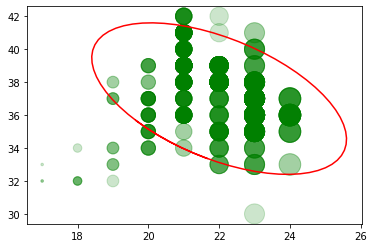

In [262]:
import numpy as np
plt.scatter(df['temperatura'], df['humedad'], color='xkcd:green', alpha=0.2, s=(df['temperatura']-16.9)*66)
theta = np.arange(4, 11, 0.1)
plt.plot(22+3.6 * np.cos(theta), 37+4.6 * np.sin(theta+12),color='red')
plt.show()

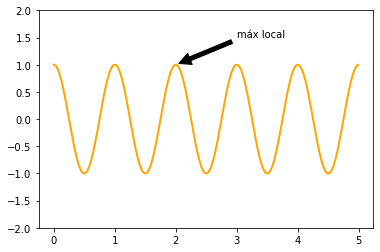

In [264]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2, color='orange')

ax.annotate('máx local', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()

### Ejercicio 8:

Dibuja el gráfico de temperaturas en color verde.